# PIMA DIABETES DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
diabetes = pd.read_csv("PimaDiabetes.csv")

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       750 non-null    int64  
 1   Glucose           750 non-null    int64  
 2   BloodPressure     750 non-null    int64  
 3   SkinThickness     750 non-null    int64  
 4   Insulin           750 non-null    int64  
 5   BMI               750 non-null    float64
 6   DiabetesPedigree  750 non-null    float64
 7   Age               750 non-null    int64  
 8   Outcome           750 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.9 KB


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667,0.346667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872,0.476226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.isnull().sum()

Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

In [6]:
diabetes.isnull().any()

Pregnancies         False
Glucose             False
BloodPressure       False
SkinThickness       False
Insulin             False
BMI                 False
DiabetesPedigree    False
Age                 False
Outcome             False
dtype: bool

In [7]:
diabetes.isna().any()

Pregnancies         False
Glucose             False
BloodPressure       False
SkinThickness       False
Insulin             False
BMI                 False
DiabetesPedigree    False
Age                 False
Outcome             False
dtype: bool

# EDA

### 1. Univariate

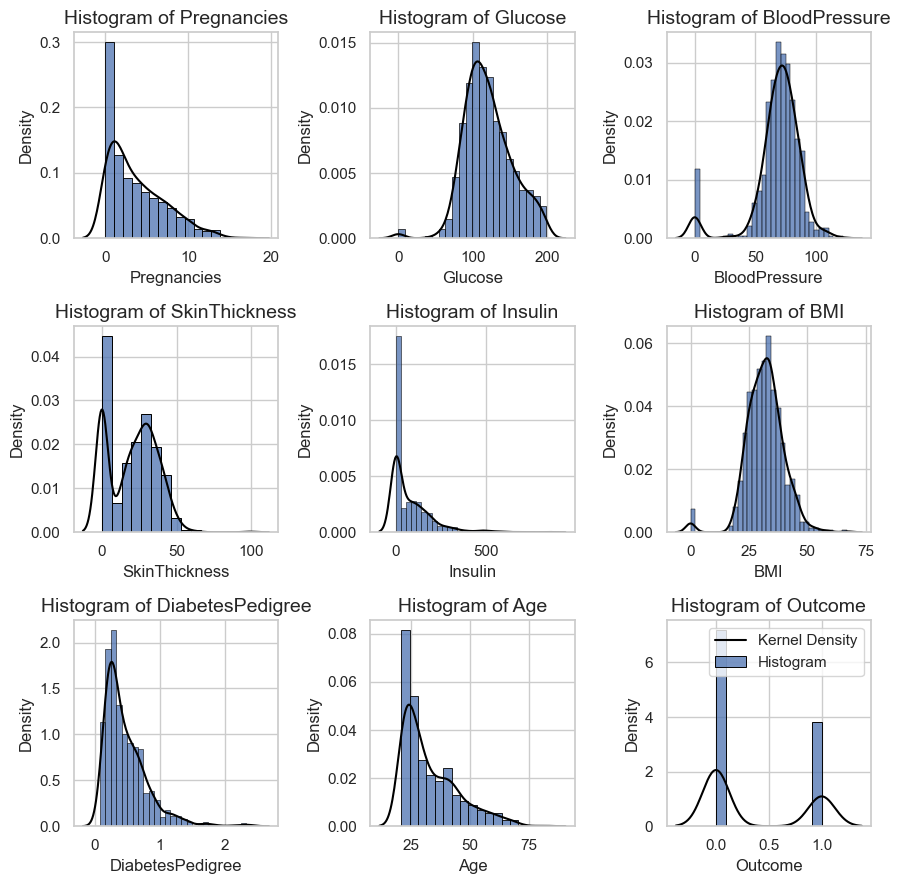

In [8]:
#Setting the figure dimensions
sns.set(style="whitegrid")
plt.figure(figsize=(9,9))

#Drawing histogram subplots for each feature
for i, column in enumerate(diabetes.columns):
    plt.subplot(3,3,i+1)
    sns.kdeplot(diabetes[column], color="black", label="Kernel Density")
    sns.histplot(diabetes[column], stat="density", edgecolor="black",label="Histogram") # bins=20
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    
plt.legend()
plt.tight_layout()
plt.show()

0    490
1    260
Name: Outcome, dtype: int64


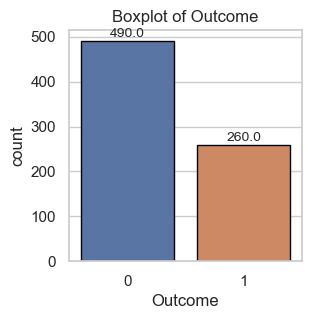

In [9]:
print(diabetes['Outcome'].value_counts())
plt.figure(figsize=(3,3))
cp = sns.countplot(x='Outcome',data=diabetes,edgecolor='black')

# Adding count numbers on the bars
for p in cp.patches:
    cp.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)


plt.title('Boxplot of Outcome')
plt.show()

### 2. Bivariate

#### Kde plot

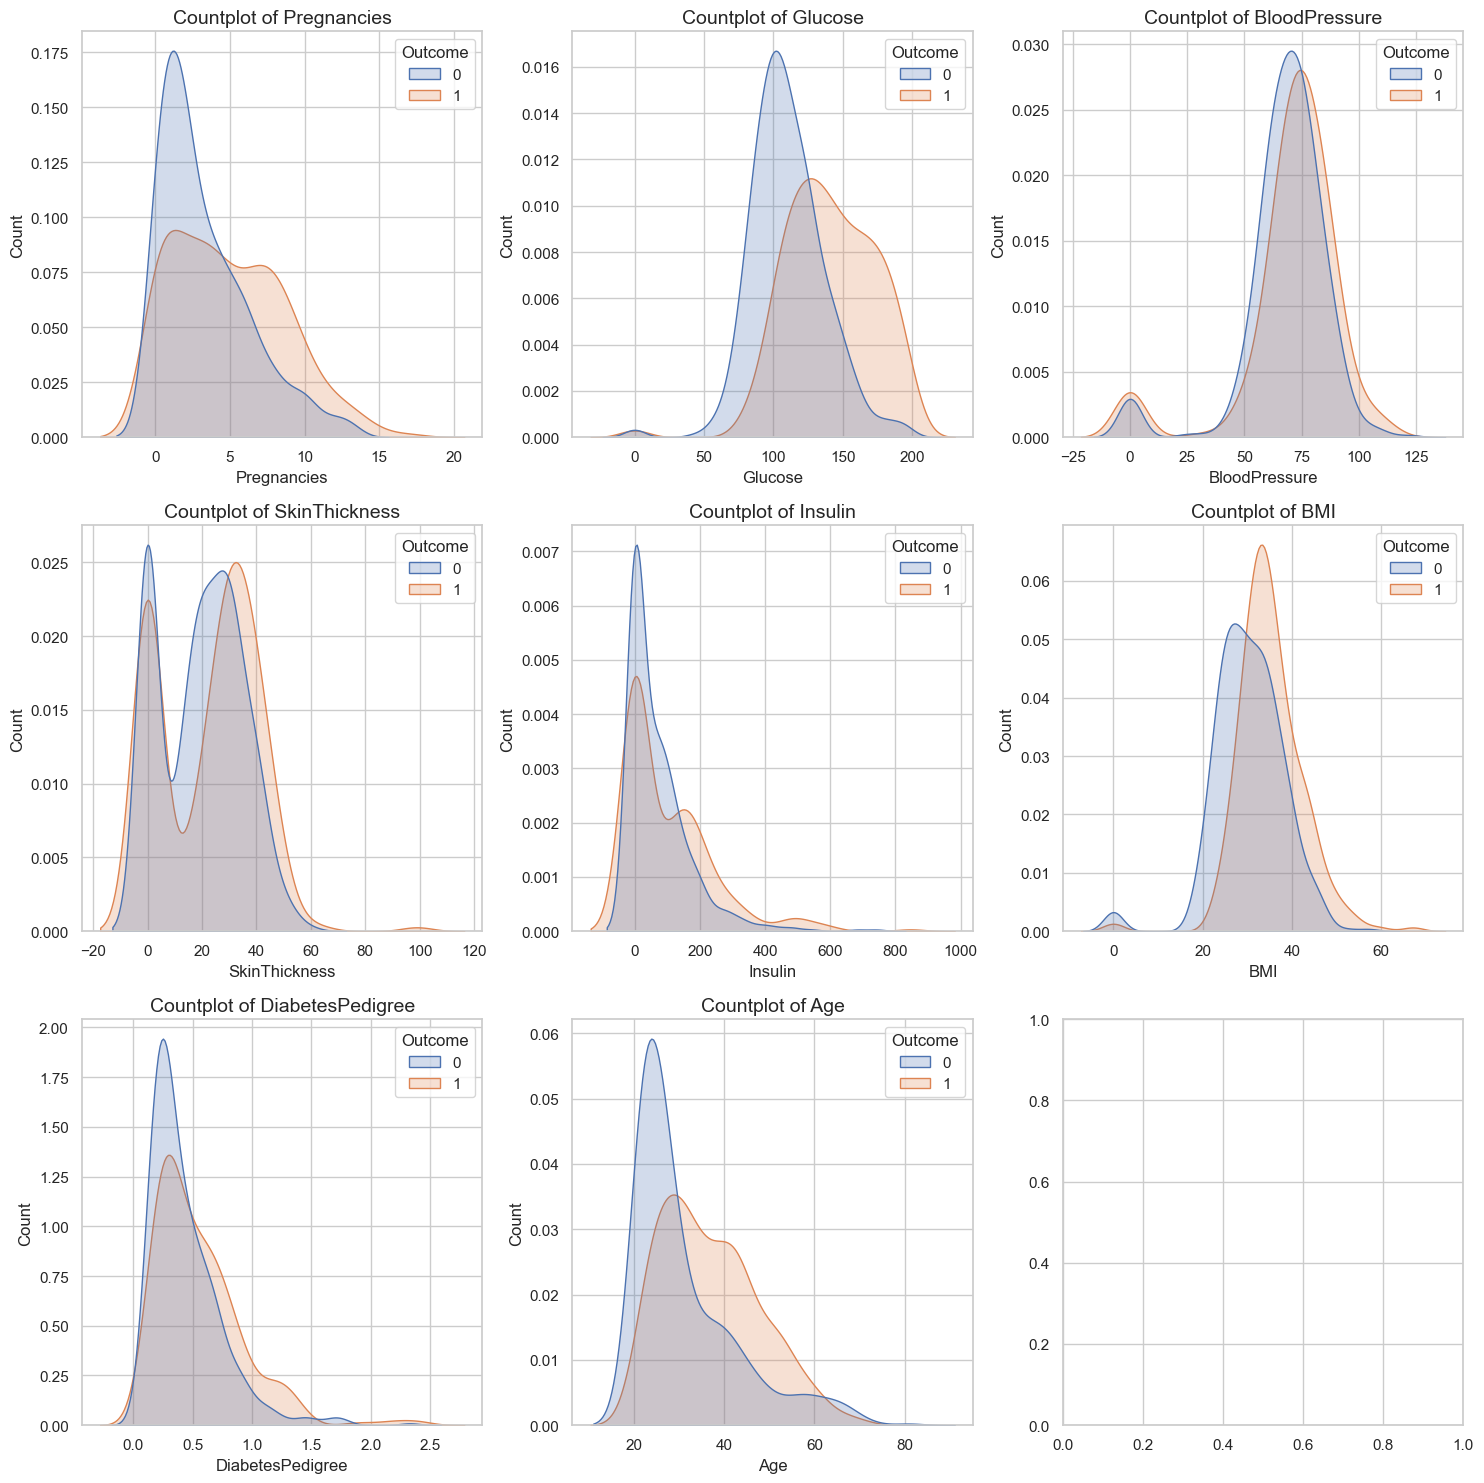

In [10]:
# Setting the figure dimensions
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over columns and create count plots
for i, column in enumerate(diabetes.columns[:-1]):  # Exclude 'Outcome' from count plots
    sns.kdeplot(x=column, hue='Outcome', data=diabetes, ax=axes[i], fill=True, common_norm=False)
    axes[i].set_title(f'Countplot of {column}', fontsize=14)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xlabel(column, fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### Box plot

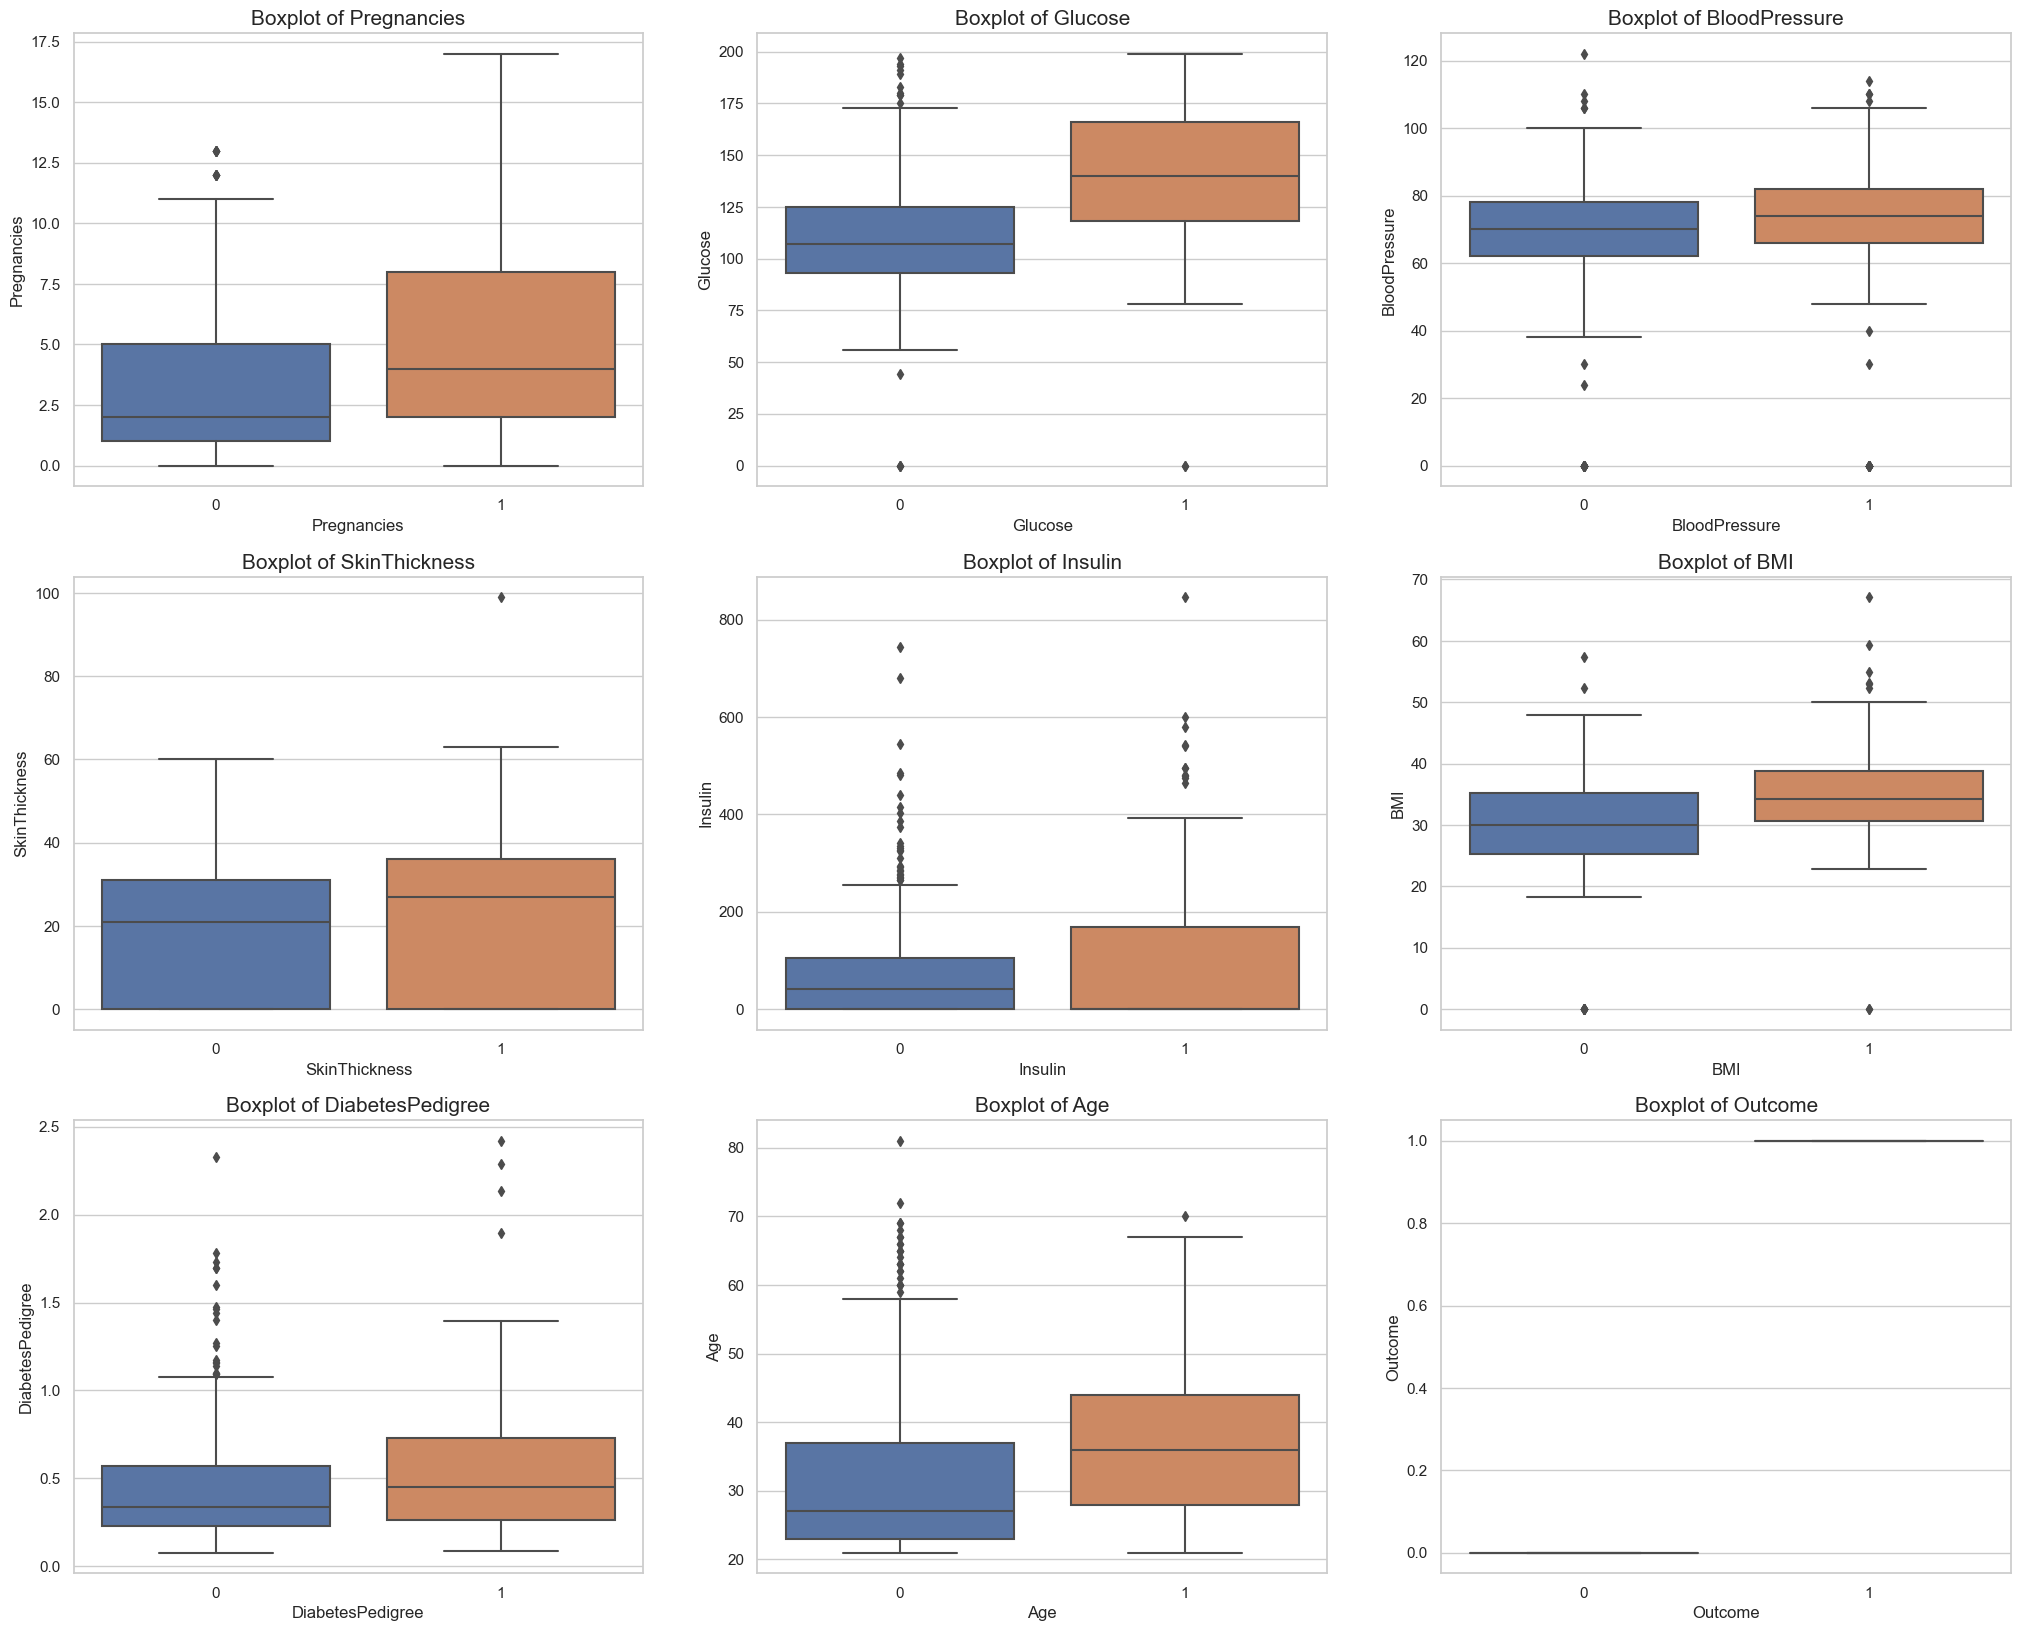

In [11]:
plt.figure(figsize = (25, 20))
for i,column in enumerate(diabetes.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='Outcome',y=column,data=diabetes)
    plt.title(f'Boxplot of {column}',fontsize=15)
    plt.ylabel(column)
    plt.xlabel(f'{column}')

plt.show()

#### Correlation - before data cleaning

In [12]:
corr_matrix_pearson = diabetes.corr(method='pearson')
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.129594,0.142453,-0.087047,-0.070822,0.021739,-0.031085,0.547124,0.229235
Glucose,0.129594,1.000000,0.145972,0.056647,0.333005,0.214316,0.140364,0.259797,0.460310
BloodPressure,0.142453,0.145972,1.000000,0.205494,0.086750,0.278569,0.042922,0.237693,0.060860
SkinThickness,-0.087047,0.056647,0.205494,1.000000,0.436093,0.394615,0.189191,-0.115862,0.082205
Insulin,-0.070822,0.333005,0.086750,0.436093,1.000000,0.195726,0.191289,-0.040152,0.130928
BMI,0.021739,0.214316,0.278569,0.394615,0.195726,1.000000,0.143798,0.032972,0.289832
DiabetesPedigree,-0.031085,0.140364,0.042922,0.189191,0.191289,0.143798,1.000000,0.041807,0.170688
Age,0.547124,0.259797,0.237693,-0.115862,-0.040152,0.032972,0.041807,1.000000,0.232892
Outcome,0.229235,0.460310,0.060860,0.082205,0.130928,0.289832,0.170688,0.232892,1.000000


##### Observations:

##### There are no strong correlation between the features. The 'strongest' are the following:
1. Age * Pregnancies (0.55) - Older women tend to have higher number of pregnancies
2. Glucose * Insulin (0.33)
3. Glucose * Outcome (0.46) - Women having higher glucose tend to have higher level of insulin i.e higher chances of Diabetes
4. Skin Thickness * Insulin (0.43)
4. SkinThickness * BMI (0.39) - Women with higher fold skin thickness value tend to have higher BMI i.e obese which leads to diabetes

#### HeatMap

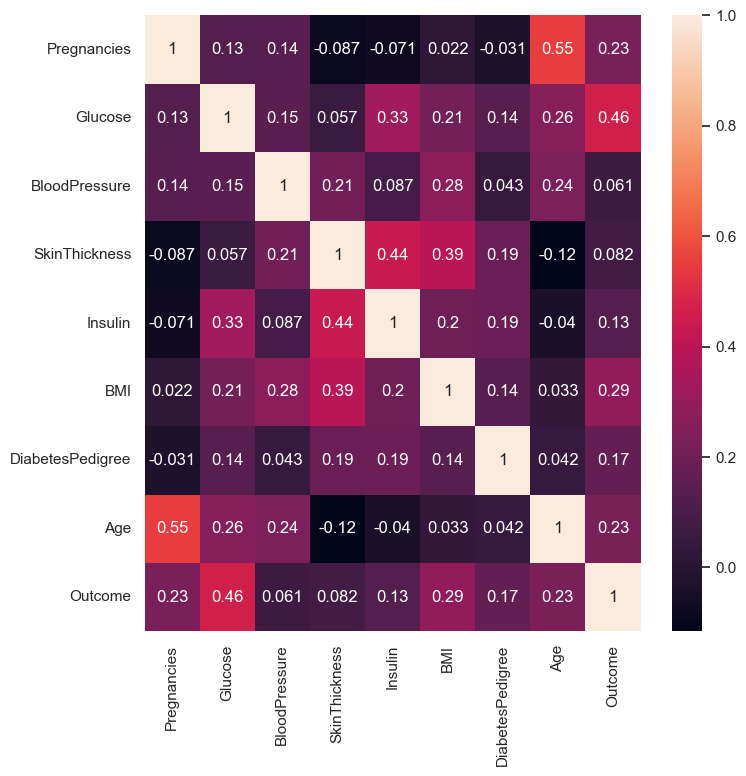

In [13]:
plt.figure(figsize=(8,8))
p=sns.heatmap(corr_matrix_pearson, annot=True)

### 3. MULTIVARIATE

#### Pair plot

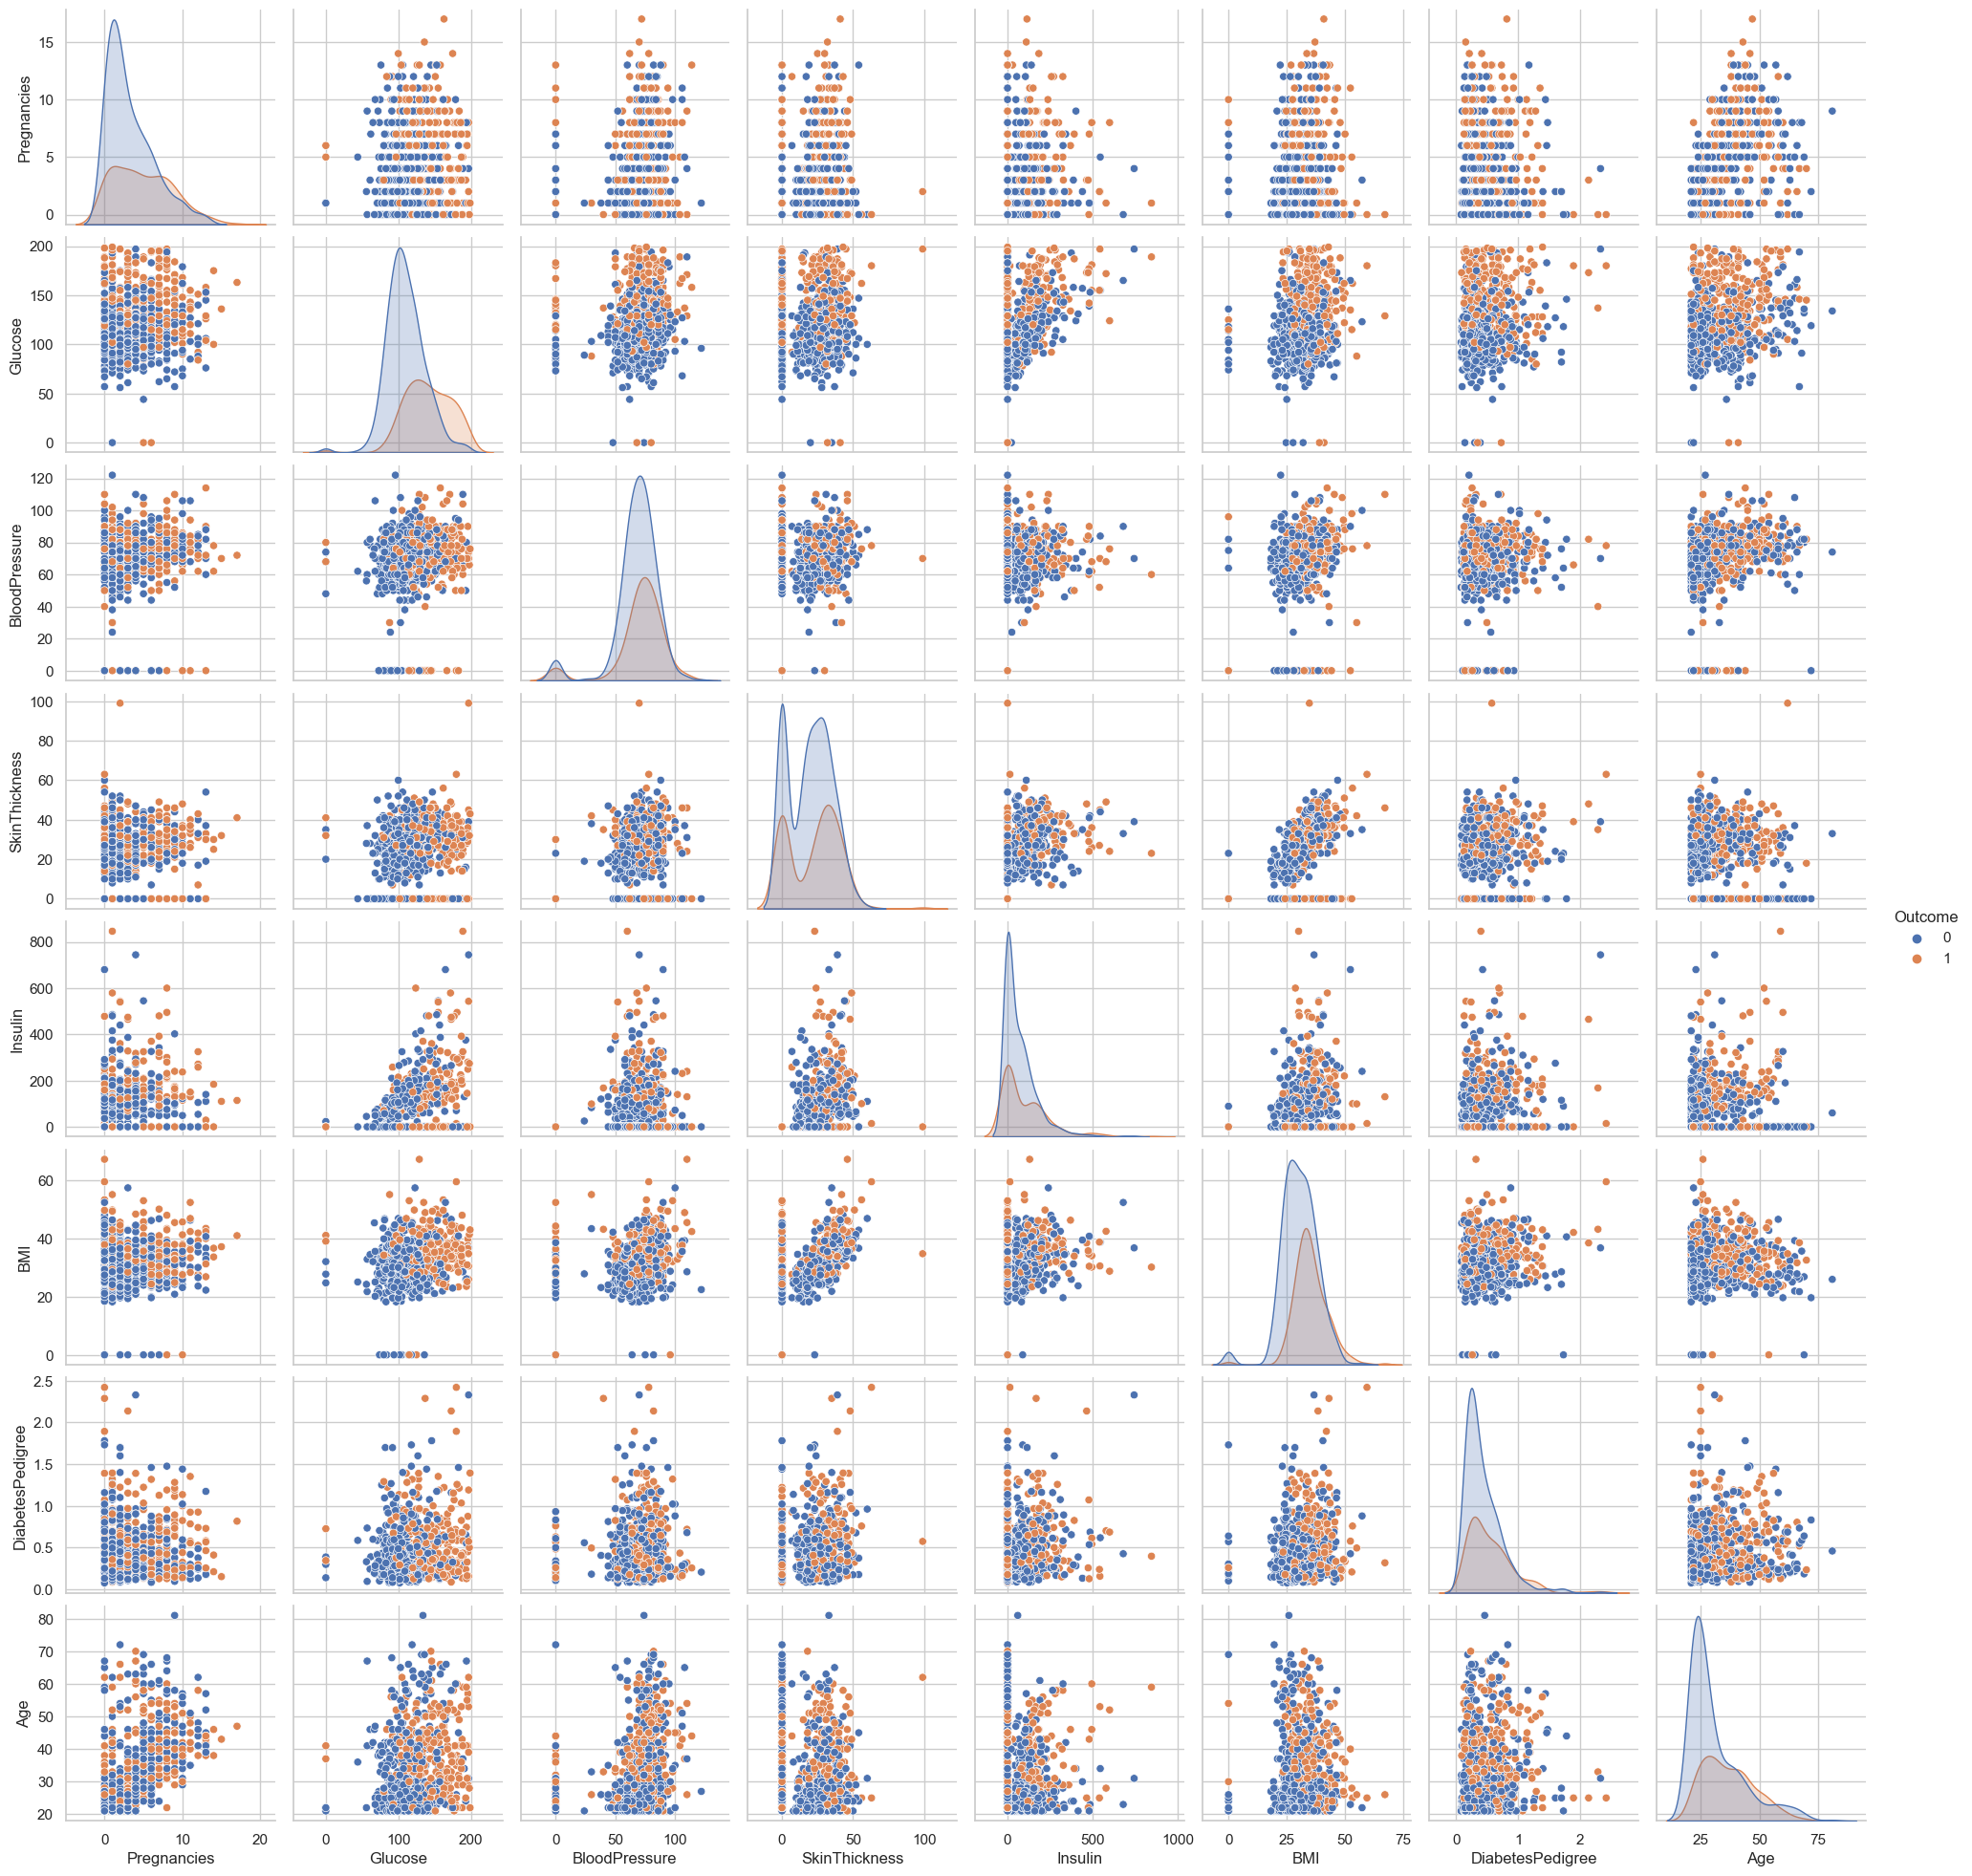

In [14]:
sns.pairplot(diabetes,hue='Outcome',diag_kind='kde')

##### Observations:

The pairs plot builds on two basic figures, KDE and the scatter plot. The KDE on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack there of) between two variables.

1)The diagonal shows the distribution of the the dataset with the kernel density plots.

2)The scatter-plots shows the relation between each and every attribute or features taken pairwise. 

#### Scatter plot

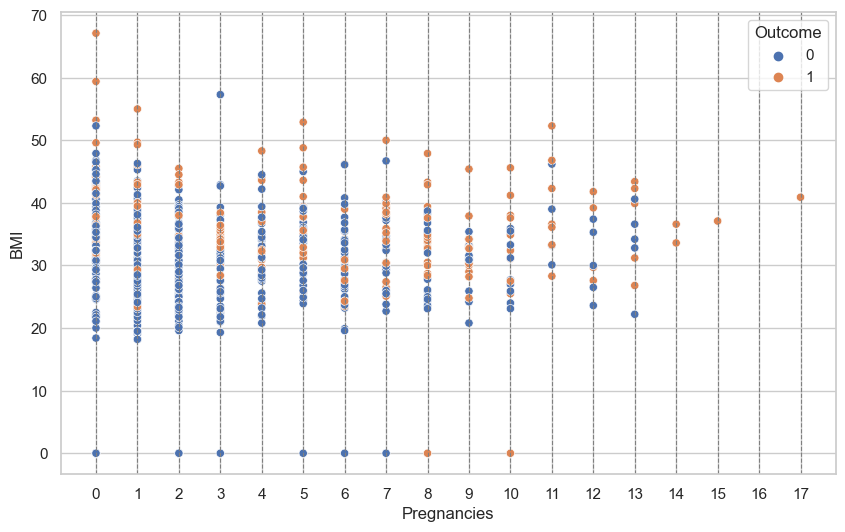

In [15]:
# Setting the figure dimensions
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with specified bins on the x-axis
sns.scatterplot(data=diabetes, x='Pregnancies', y='BMI', hue='Outcome')

# Define bins on the x-axis
bins = range(0, 18)

# Plot vertical lines to represent the bins
for bin in bins:
    ax.axvline(bin, color='gray', linestyle='--', linewidth=0.8)

# Set x-axis ticks to match bin edges
ax.set_xticks(bins)

# Show the plot
plt.show()

# Pre-processing

In [16]:
data_copy = diabetes.copy(deep=True)
data_copy[['Glucose','BloodPressure','SkinThickness','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.NaN)
data_copy.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
5,5,116.0,74.0,NaN,0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88,31.0,0.248,26,1
7,10,115.0,NaN,NaN,0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543,30.5,0.158,53,1
9,8,125.0,96.0,NaN,0,NaN,0.232,54,1


In [17]:
data_copy.isnull().sum()

Pregnancies           0
Glucose               5
BloodPressure        35
SkinThickness       221
Insulin               0
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome               0
dtype: int64

In [18]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].median(),inplace=True)

In [19]:
data_copy.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.000000,35.0,0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88,31.0,0.248,26,1
7,10,115.0,72.359441,29.0,0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,0,32.3,0.232,54,1


#### Correlation - After data cleaning

In [20]:
#corr on cleaned data
data_copy.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.128013,0.211142,0.080584,-0.070822,0.026301,-0.031085,0.547124,0.229235
Glucose,0.128013,1.000000,0.209368,0.191392,0.332599,0.223439,0.140103,0.262784,0.486999
BloodPressure,0.211142,0.209368,1.000000,0.184651,-0.055241,0.276083,-0.002406,0.323672,0.162434
SkinThickness,0.080584,0.191392,0.184651,1.000000,0.109116,0.544432,0.106426,0.120875,0.216461
Insulin,-0.070822,0.332599,-0.055241,0.109116,1.000000,0.181643,0.191289,-0.040152,0.130928
BMI,0.026301,0.223439,0.276083,0.544432,0.181643,1.000000,0.156856,0.021955,0.309156
DiabetesPedigree,-0.031085,0.140103,-0.002406,0.106426,0.191289,0.156856,1.000000,0.041807,0.170688
Age,0.547124,0.262784,0.323672,0.120875,-0.040152,0.021955,0.041807,1.000000,0.232892
Outcome,0.229235,0.486999,0.162434,0.216461,0.130928,0.309156,0.170688,0.232892,1.000000


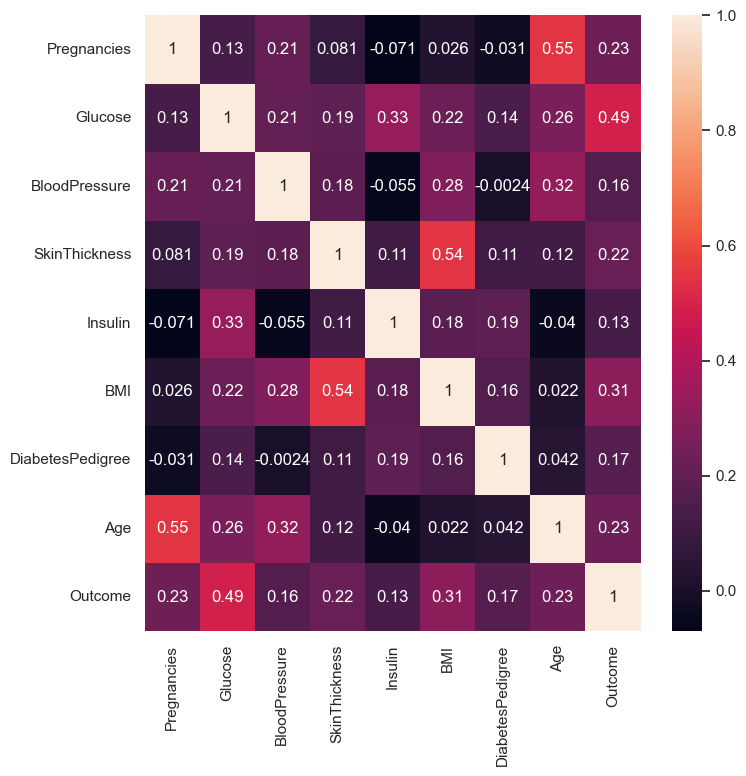

In [21]:
plt.figure(figsize=(8,8))
p=sns.heatmap(data_copy.corr(), annot=True)

In [22]:
print(data_copy.isnull().sum())

Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64


### Feature Addition

In [23]:
data_copy['SevenOrMorePregnancies'] = (data_copy['Pregnancies'] >= 7).astype('int64')

In [24]:
data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,SevenOrMorePregnancies
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1,0
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0,0
2,8,183.0,64.0,29.0,0,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
745,12,100.0,84.0,33.0,105,30.0,0.488,46,0,1
746,1,147.0,94.0,41.0,0,49.3,0.358,27,1,0
747,1,81.0,74.0,41.0,57,46.3,1.096,32,0,0
748,3,187.0,70.0,22.0,200,36.4,0.408,36,1,0


In [25]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             750 non-null    int64  
 1   Glucose                 750 non-null    float64
 2   BloodPressure           750 non-null    float64
 3   SkinThickness           750 non-null    float64
 4   Insulin                 750 non-null    int64  
 5   BMI                     750 non-null    float64
 6   DiabetesPedigree        750 non-null    float64
 7   Age                     750 non-null    int64  
 8   Outcome                 750 non-null    int64  
 9   SevenOrMorePregnancies  750 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 58.7 KB


# Scaling the Dataset

In [26]:
columns_to_transform = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                        'DiabetesPedigree', 'Age']

In [27]:
scaler = StandardScaler()
diabetes_scaled = pd.DataFrame(scaler.fit_transform(data_copy.drop(['Outcome','SevenOrMorePregnancies'],
                                                                   axis=1),),
                columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
                         'DiabetesPedigree','Age'])
      

In [28]:
diabetes_scaled['Outcome'] = data_copy['Outcome']
diabetes_scaled['SevenOrMorePregnancies'] = data_copy['SevenOrMorePregnancies']

diabetes_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,SevenOrMorePregnancies
0,0.640173,0.869251,-0.029631,0.676801,-0.699295,0.169254,0.462359,1.438616,1,0
1,-0.844459,-1.200994,-0.524255,-0.003933,-0.699295,-0.845805,-0.369222,-0.185168,0,0
2,1.234026,2.019388,-0.689129,-0.003933,-0.699295,-1.324333,0.597943,-0.099706,1,1
3,-0.844459,-1.069549,-0.524255,-0.684667,0.118506,-0.628293,-0.923609,-1.039792,0,0
4,-1.141385,0.507780,-2.667624,0.676801,0.762306,1.546834,5.466909,-0.014244,1,0
...,...,...,...,...,...,...,...,...,...,...
745,2.421732,-0.708078,0.959616,0.449890,0.214206,-0.352777,0.043556,1.096766,0,1
746,-0.844459,0.836390,1.783988,1.357535,-0.699295,2.445887,-0.348131,-0.527018,1,0
747,-0.844459,-1.332438,0.135243,1.357535,-0.203394,2.010861,1.875444,-0.099706,0,0
748,-0.250606,2.150832,-0.194506,-0.798123,1.040706,0.575278,-0.197482,0.242143,1,0


### Applying Logistics Regression - Fitting the model Using Single Predictor

In [29]:
X = diabetes_scaled[['SevenOrMorePregnancies']]
y = diabetes_scaled['Outcome']

In [30]:
#Split the data into training and testing parts
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [31]:
#model = sm.Logit(y,X)
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
print("x_train = %s, y_train = %s, x_test = %s, y_test= %s"%(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

x_train = (600, 1), y_train = (600,), x_test = (150, 1), y_test= (150,)


In [33]:
# Calculate and print the coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("Coefficients:", coefficients)
print("Intercept:", intercept)

#Predicting the test data based on the trained model
y_pred = model.predict(X_test)
y_pred

Coefficients: [1.21123091]
Intercept: -0.9383511416711879


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

#### Probability of getting diabetes: SevenOrMorePregnancies

In [34]:
y_prob = model.predict_proba(X_test)[:,-1]

#Probability for diabetes based on no. of pregnancies
probability_six_or_lesser = model.predict_proba([[0]])[0,1]
probability_seven_or_more = model.predict_proba([[1]])[0,1]

# Print the results
print(f"Probability of diabetes with six or fewer pregnancies: {probability_six_or_lesser:.4f}")
print(f"Probability of diabetes with seven or more pregnancies: {probability_seven_or_more:.4f}")

Probability of diabetes with six or fewer pregnancies: 0.2812
Probability of diabetes with seven or more pregnancies: 0.5678


C:\Users\abhis\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Regression Models

In [35]:
# Define the predictor variables (features) and target variable
#x = diabetes_scaled.drop(['Outcome','SevenOrMorePregnancies'],axis=1) #Choose relevant features
x = diabetes_scaled[['Glucose','BMI','Age']]
y = diabetes_scaled['Outcome']

#Split the data into training and testing parts
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

print("x_train = %s, y_train = %s, x_test = %s, y_test= %s"%(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

x_train = (600, 3), y_train = (600,), x_test = (150, 3), y_test= (150,)


### Logistic Regression

In [36]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

log_acc=accuracy_score(y_test,y_pred)
log_pre=precision_score(y_test, y_pred)

print("Training Score:\n",reg.score(x_train,y_train)*100)
print("\nTesting Score:\n",reg.score(x_test,y_test)*100)
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nAccuracy:\n",accuracy_score(y_test,y_pred)*100)
print("\nPrecision:\n",precision_score(y_test, y_pred)*100)
print("\nAUC:\n",roc_auc_score(y_test, y_pred))
print("\nF1 score:\n",f1_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Training Score:
 75.16666666666667

Testing Score:
 82.0

Confusion Matrix:
 [[85 13]
 [14 38]]

Accuracy:
 82.0

Precision:
 74.50980392156863

AUC:
 0.7990580847723705

F1 score:
 0.7378640776699028

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        98
           1       0.75      0.73      0.74        52

    accuracy                           0.82       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.82      0.82      0.82       150



### KNN

In [37]:
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

knn_acc=accuracy_score(y_test,y_pred)
knn_pre=precision_score(y_test, y_pred)

print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Testing Score:\n",reg.score(x_test,y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred)*100)
print("Precision:\n",precision_score(y_test, y_pred)*100)
print("AUC:\n",roc_auc_score(y_test, y_pred))
print("F1 score:\n",f1_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Training Score:
 80.66666666666666
Testing Score:
 82.0
Confusion Matrix:
 [[73 25]
 [19 33]]
Accuracy:
 70.66666666666667
Precision:
 56.896551724137936
AUC:
 0.689756671899529
F1 score:
 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77        98
           1       0.57      0.63      0.60        52

    accuracy                           0.71       150
   macro avg       0.68      0.69      0.68       150
weighted avg       0.72      0.71      0.71       150



### D TREE

In [38]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=12,criterion='entropy')
dtree.fit(x_train,y_train)

y_pred=dtree.predict(x_test)

dtree_acc=accuracy_score(y_test,y_pred)
dtree_pre=precision_score(y_test, y_pred)

print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Testing Score:\n",dtree.score(x_test,y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred)*100)
print("Precision:\n",precision_score(y_test, y_pred)*100)
print("AUC:\n",roc_auc_score(y_test, y_pred))
print("F1 score:\n",f1_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Training Score:
 82.16666666666667
Testing Score:
 70.0
Confusion Matrix:
 [[68 30]
 [15 37]]
Accuracy:
 70.0
Precision:
 55.223880597014926
AUC:
 0.7027080062794349
F1 score:
 0.6218487394957983
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.69      0.75        98
           1       0.55      0.71      0.62        52

    accuracy                           0.70       150
   macro avg       0.69      0.70      0.69       150
weighted avg       0.73      0.70      0.71       150



### Gradient Boost

In [39]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

y_pred=gbc.predict(x_test)

gbc_acc=accuracy_score(y_test,y_pred)
gbc_pre=precision_score(y_test, y_pred)

print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Testing Score:\n",gbc.score(x_test,y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred)*100)
print("Precision:\n",precision_score(y_test, y_pred)*100)
print("AUC:\n",roc_auc_score(y_test, y_pred))
print("F1 score:\n",f1_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Training Score:
 87.83333333333333
Testing Score:
 79.33333333333333
Confusion Matrix:
 [[82 16]
 [15 37]]
Accuracy:
 79.33333333333333
Precision:
 69.81132075471697
AUC:
 0.7741365777080064
F1 score:
 0.7047619047619047
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        98
           1       0.70      0.71      0.70        52

    accuracy                           0.79       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.79      0.79      0.79       150



### Random Forest

In [40]:
rfc=RandomForestClassifier(n_estimators=400)
rfc.fit(x_train,y_train)

y_pred=gbc.predict(x_test)

rfc_acc=accuracy_score(y_test,y_pred)
rfc_pre=precision_score(y_test, y_pred)

print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Testing Score:\n",rfc.score(x_test,y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred)*100)
print("Precision:\n",precision_score(y_test, y_pred)*100)
print("AUC:\n",roc_auc_score(y_test, y_pred))
print("F1 score:\n",f1_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Training Score:
 100.0
Testing Score:
 73.33333333333333
Confusion Matrix:
 [[82 16]
 [15 37]]
Accuracy:
 79.33333333333333
Precision:
 69.81132075471697
AUC:
 0.7741365777080064
F1 score:
 0.7047619047619047
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        98
           1       0.70      0.71      0.70        52

    accuracy                           0.79       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.79      0.79      0.79       150



## Applying Cross Validation

### Logistic Regression

In [41]:
# Perform cross-validation
cross_val_scores = cross_val_score(reg, x, y, cv=5)  # cv is the number of folds

print("Cross-Validation Scores:", cross_val_scores*100)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [78.66666667 73.33333333 75.33333333 77.33333333 77.33333333]
Mean Cross-Validation Score: 0.764


### KNN

In [42]:
# Perform cross-validation
cross_val_scores = cross_val_score(knn, x, y, cv=5)  # cv is the number of folds

print("Cross-Validation Scores:", cross_val_scores*100)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [73.33333333 70.         74.66666667 78.         72.66666667]
Mean Cross-Validation Score: 0.7373333333333333


### D TREE

In [43]:
# Perform cross-validation
cross_val_scores = cross_val_score(dtree, x, y, cv=5)  # cv is the number of folds

print("Cross-Validation Scores:", cross_val_scores*100)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [70.66666667 69.33333333 78.         72.66666667 73.33333333]
Mean Cross-Validation Score: 0.728


### Gradient Boost

In [44]:
# Perform cross-validation
cross_val_scores = cross_val_score(gbc, x, y, cv=5)  # cv is the number of folds

print("Cross-Validation Scores:", cross_val_scores*100)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [77.33333333 71.33333333 78.66666667 80.         73.33333333]
Mean Cross-Validation Score: 0.7613333333333333


### Random Forest

In [45]:
# Perform cross-validation
cross_val_scores = cross_val_score(rfc, x, y, cv=5)  # cv is the number of folds

print("Cross-Validation Scores:", cross_val_scores*100)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [75.33333333 71.33333333 75.33333333 79.33333333 72.        ]
Mean Cross-Validation Score: 0.7466666666666667


## Model Analysis and Selection

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'Decision Tree Classifier','Gradient Boosting Classifier','Random Forest Classifier'],
    'Training Score':[reg.score(x_train,y_train)*100,knn.score(x_train,y_train)*100,dtree.score(x_train,y_train)*100,gbc.score(x_train,y_train)*100,rfc.score(x_train,y_train)*100],
    'Accuracy': [ log_acc*100,knn_acc*100, dtree_acc*100, gbc_acc*100, rfc_acc*100],
    'Precision':[log_pre,knn_pre,dtree_pre,gbc_pre,rfc_pre]
})

models.sort_values(by = 'Accuracy', ascending = False)

,Model,Training Score,Accuracy,Precision
0,Logistic,75.166667,82.000000,0.745098
3,Gradient Boosting Classifier,87.833333,79.333333,0.698113
4,Random Forest Classifier,100.000000,79.333333,0.698113
1,KNN,80.666667,70.666667,0.568966
2,Decision Tree Classifier,82.166667,70.000000,0.552239


## Prediction Using Logistic Regression

In [47]:
columns_to_transform = ['Glucose','BMI','Age']
to_predict = pd.read_csv("ToPredict.csv")
to_predict2 = to_predict[columns_to_transform]

#scaling the data
to_predict_scaled = pd.DataFrame(scaler.fit_transform(to_predict2[columns_to_transform]),columns=columns_to_transform)
to_predict_scaled

,Glucose,BMI,Age
0,-0.156221,-0.522552,-0.885186
1,-0.742052,0.759179,-0.147531
2,-1.249771,-1.377038,-0.516359
3,1.601269,1.465774,-0.393416
4,0.546775,-0.325362,1.942492


In [48]:
predictions = reg.predict(to_predict_scaled)
probabilities = reg.predict_proba(to_predict_scaled)[:, 1]  # Probability of positive class
to_predict['Outcome'] = predictions
to_predict['Probability']=probabilities
to_predict

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,Probability
0,4,136,70,0,0,31.2,1.182,22,0,0.164914
1,1,121,78,39,74,39.0,0.261,28,0,0.237446
2,3,108,62,24,0,26.0,0.223,25,0,0.042462
3,0,181,88,44,510,43.3,0.222,26,1,0.825527
4,8,154,78,32,0,32.4,0.443,45,1,0.565364
